In [448]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as seaborn

import statsmodels.api as sm

In [449]:
df= pd.read_csv('archivo.csv')

In [450]:
df.head()

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
1,30000001,mujer,25,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
2,30000001,mujer,1,nieto,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
3,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
4,30000011,mujer,14,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46327 entries, 0 to 46326
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LLAVE_HOGAR                        46327 non-null  int64  
 1   sexo                               46327 non-null  object 
 2   edad                               46327 non-null  int64  
 3   parentesco_jefe_hogar              46327 non-null  object 
 4   estado_civil                       39867 non-null  object 
 5   viaje_noche_fuera                  39867 non-null  object 
 6   motivo_viaje                       3898 non-null   object 
 7   compañía_viaje                     3898 non-null   object 
 8   destino_depto                      3898 non-null   object 
 9   destino_municipio                  3898 non-null   object 
 10  monto_ultimo_viaje                 3898 non-null   float64
 11  num_viajes_12_meses                3847 non-null   flo

In [452]:
df= df[df['parentesco_jefe_hogar']=='jefe_hogar']. reset_index(drop=True)

##datos clave

 0   ingreso_mensual_aprox    924 non-null    float64

 1   estrato                  924 non-null    float64

 2   num_noches               924 non-null    object 

 3   area                     924 non-null    object 

 4   diploma_obtenido         924 non-null    object 

 5   nivel_educativo          924 non-null    object 

 6   leer_escribir            924 non-null    object 

 7   gastos_transporte_valor  924 non-null    float64

 8   compañía_viaje           924 non-null    object 

 9   motivo_viaje             924 non-null    object 

 10  viaje_noche_fuera        924 non-null    object 

 11  estado_civil             924 non-null    object 

 12  edad                     924 non-null    int64

In [453]:
fila1=['ingreso_mensual_aprox','estrato','num_noches','area','diploma_obtenido','nivel_educativo','gastos_transporte_valor','compañía_viaje','motivo_viaje','viaje_noche_fuera','estado_civil','edad']

In [454]:
df=df[fila1]

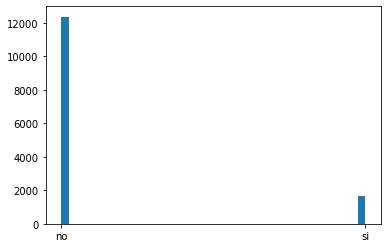

In [455]:
plt.hist(df['viaje_noche_fuera'],bins=40)
plt.show()

In [456]:
df.replace({'viaje_noche_fuera':{'si':1,'no':0}},inplace=True)

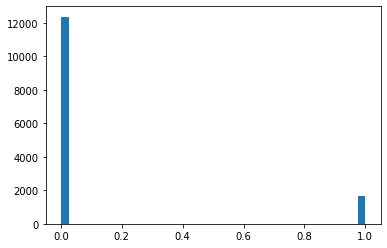

In [457]:
plt.hist(df['viaje_noche_fuera'],bins=40)
plt.show()

In [458]:
import statsmodels.api as sm

In [493]:
y = df['viaje_noche_fuera']
X = df['edad']
X = sm.add_constant(X)
model = sm.OLS(y, X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      viaje_noche_fuera   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -922.0
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               1.00
Time:                        16:55:56   Log-Likelihood:                 32271.
No. Observations:                 924   AIC:                        -6.454e+04
Df Residuals:                     922   BIC:                        -6.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   1.66e-17   6.01e+16      0.000       1.000       1.000
edad        5.421e-18   3.59e-19     15.084      0.000    4.72e-18    6.13e-18
==============================================================================
Omnibus:                     4880.332   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.981
Skew:                          -0.002   Prob(JB):                     2.63e-23
Kurtosis:                       1.357   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [498]:
y = df['viaje_noche_fuera']
X = df['gastos_transporte_valor']
X = sm.add_constant(X)
model = sm.OLS(y, X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      viaje_noche_fuera   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -922.0
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               1.00
Time:                        16:58:29   Log-Likelihood:                 30980.
No. Observations:                 924   AIC:                        -6.196e+04
Df Residuals:                     922   BIC:                        -6.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.0000   2.81e-17   3.55e+16      0.000       1.000       1.000
gastos_transporte_valor -1.191e-22   1.43e-22     -0.833      0.405      -4e-22    1.62e-22
==============================================================================
Omnibus:                     1582.570   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           640908.327
Skew:                          11.358   Prob(JB):                         0.00
Kurtosis:                     130.008   Cond. No.                     2.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ingreso_mensual_aprox    13793 non-null  float64
 1   estrato                  14017 non-null  float64
 2   num_noches               1618 non-null   object 
 3   area                     14029 non-null  object 
 4   diploma_obtenido         8545 non-null   object 
 5   nivel_educativo          14029 non-null  object 
 6   gastos_transporte_valor  1231 non-null   float64
 7   compañía_viaje           1618 non-null   object 
 8   motivo_viaje             1618 non-null   object 
 9   viaje_noche_fuera        14029 non-null  int64  
 10  estado_civil             14029 non-null  object 
 11  edad                     14029 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 1.3+ MB


In [463]:
fila1.sort()

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ingreso_mensual_aprox    13793 non-null  float64
 1   estrato                  14017 non-null  float64
 2   num_noches               1618 non-null   object 
 3   area                     14029 non-null  object 
 4   diploma_obtenido         8545 non-null   object 
 5   nivel_educativo          14029 non-null  object 
 6   gastos_transporte_valor  1231 non-null   float64
 7   compañía_viaje           1618 non-null   object 
 8   motivo_viaje             1618 non-null   object 
 9   viaje_noche_fuera        14029 non-null  int64  
 10  estado_civil             14029 non-null  object 
 11  edad                     14029 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 1.3+ MB


In [465]:
df=df.drop_duplicates()

In [466]:
df=df.dropna()

In [467]:
df

,ingreso_mensual_aprox,estrato,num_noches,area,diploma_obtenido,nivel_educativo,gastos_transporte_valor,compañía_viaje,motivo_viaje,viaje_noche_fuera,estado_civil,edad
24,1000000.0,3.0,6.0,ANTIOQUIA,bachiller,media,70000.0,personas_hogar_no_compartir_gastos,visita_parientes,1,soltero,55
64,3600000.0,1.0,1.0,ATLANTICO,tecnico_tecnologo,superior_universitaria,50000.0,solo,visita_parientes,1,soltero,45
76,1200000.0,3.0,5.0,BOGOTA,tecnico_tecnologo,superior_universitaria,200000.0,personas_no_hogar_compartir,recreación,1,viudo,42
77,1500000.0,3.0,18.0,BOGOTA,universitario,superior_universitaria,80000.0,solo,recreación,1,soltero,34
80,1200000.0,3.0,3.0,BOGOTA,bachiller,media,90000.0,personas_hogar_no_compartir_gastos,recreación,1,pareja_union_libre,51
...,...,...,...,...,...,...,...,...,...,...,...,...
13997,6000000.0,4.0,2.0,SANTANDER,universitario,superior_universitaria,50000.0,solo,visita_parientes,1,casado,58
14015,950000.0,3.0,2.0,CALDAS,bachiller,media,15000.0,solo,negocios,1,soltero,28
14021,10000000.0,4.0,3.0,BOGOTA,postgrado,superior_universitaria,200000.0,personas_no_hogar_compartir,recreación,1,soltero,35
14022,2000000.0,3.0,16.0,BOLIVAR,bachiller,media,98.0,solo,negocios,1,casado,49


In [468]:
fila1.sort()

In [469]:
df.head()

,ingreso_mensual_aprox,estrato,num_noches,area,diploma_obtenido,nivel_educativo,gastos_transporte_valor,compañía_viaje,motivo_viaje,viaje_noche_fuera,estado_civil,edad
24,1000000.0,3.0,6.0,ANTIOQUIA,bachiller,media,70000.0,personas_hogar_no_compartir_gastos,visita_parientes,1,soltero,55
64,3600000.0,1.0,1.0,ATLANTICO,tecnico_tecnologo,superior_universitaria,50000.0,solo,visita_parientes,1,soltero,45
76,1200000.0,3.0,5.0,BOGOTA,tecnico_tecnologo,superior_universitaria,200000.0,personas_no_hogar_compartir,recreación,1,viudo,42
77,1500000.0,3.0,18.0,BOGOTA,universitario,superior_universitaria,80000.0,solo,recreación,1,soltero,34
80,1200000.0,3.0,3.0,BOGOTA,bachiller,media,90000.0,personas_hogar_no_compartir_gastos,recreación,1,pareja_union_libre,51


In [470]:
df.tail()

,ingreso_mensual_aprox,estrato,num_noches,area,diploma_obtenido,nivel_educativo,gastos_transporte_valor,compañía_viaje,motivo_viaje,viaje_noche_fuera,estado_civil,edad
13997,6000000.0,4.0,2.0,SANTANDER,universitario,superior_universitaria,50000.0,solo,visita_parientes,1,casado,58
14015,950000.0,3.0,2.0,CALDAS,bachiller,media,15000.0,solo,negocios,1,soltero,28
14021,10000000.0,4.0,3.0,BOGOTA,postgrado,superior_universitaria,200000.0,personas_no_hogar_compartir,recreación,1,soltero,35
14022,2000000.0,3.0,16.0,BOLIVAR,bachiller,media,98.0,solo,negocios,1,casado,49
14028,4000000.0,2.0,1.0,RISARALDA,bachiller,media,150000.0,personas_hogar_compartir_gastos,visita_parientes,1,casado,61


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 24 to 14028
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ingreso_mensual_aprox    924 non-null    float64
 1   estrato                  924 non-null    float64
 2   num_noches               924 non-null    object 
 3   area                     924 non-null    object 
 4   diploma_obtenido         924 non-null    object 
 5   nivel_educativo          924 non-null    object 
 6   gastos_transporte_valor  924 non-null    float64
 7   compañía_viaje           924 non-null    object 
 8   motivo_viaje             924 non-null    object 
 9   viaje_noche_fuera        924 non-null    int64  
 10  estado_civil             924 non-null    object 
 11  edad                     924 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 93.8+ KB


In [472]:
df.describe()

,ingreso_mensual_aprox,estrato,gastos_transporte_valor,viaje_noche_fuera,edad
count,9.240000e+02,924.000000,9.240000e+02,924.0,924.000000
mean,2.560668e+06,2.878788,1.235820e+05,1.0,43.746753
std,2.410515e+06,1.194255,1.531056e+05,0.0,15.080310
min,9.800000e+01,1.000000,9.800000e+01,1.0,17.000000
25%,1.056250e+06,2.000000,4.500000e+04,1.0,32.000000
50%,2.000000e+06,3.000000,8.000000e+04,1.0,42.000000
75%,3.000000e+06,3.000000,1.500000e+05,1.0,55.000000
max,1.800000e+07,6.000000,2.000000e+06,1.0,91.000000


In [473]:
df.duplicated().sum()

0

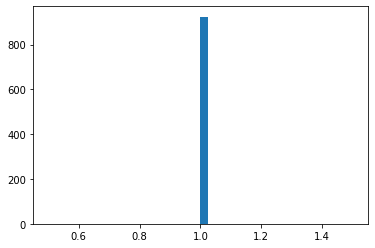

In [474]:
plt.hist(df['viaje_noche_fuera'],bins=40)
plt.show()

In [475]:
df

,ingreso_mensual_aprox,estrato,num_noches,area,diploma_obtenido,nivel_educativo,gastos_transporte_valor,compañía_viaje,motivo_viaje,viaje_noche_fuera,estado_civil,edad
24,1000000.0,3.0,6.0,ANTIOQUIA,bachiller,media,70000.0,personas_hogar_no_compartir_gastos,visita_parientes,1,soltero,55
64,3600000.0,1.0,1.0,ATLANTICO,tecnico_tecnologo,superior_universitaria,50000.0,solo,visita_parientes,1,soltero,45
76,1200000.0,3.0,5.0,BOGOTA,tecnico_tecnologo,superior_universitaria,200000.0,personas_no_hogar_compartir,recreación,1,viudo,42
77,1500000.0,3.0,18.0,BOGOTA,universitario,superior_universitaria,80000.0,solo,recreación,1,soltero,34
80,1200000.0,3.0,3.0,BOGOTA,bachiller,media,90000.0,personas_hogar_no_compartir_gastos,recreación,1,pareja_union_libre,51
...,...,...,...,...,...,...,...,...,...,...,...,...
13997,6000000.0,4.0,2.0,SANTANDER,universitario,superior_universitaria,50000.0,solo,visita_parientes,1,casado,58
14015,950000.0,3.0,2.0,CALDAS,bachiller,media,15000.0,solo,negocios,1,soltero,28
14021,10000000.0,4.0,3.0,BOGOTA,postgrado,superior_universitaria,200000.0,personas_no_hogar_compartir,recreación,1,soltero,35
14022,2000000.0,3.0,16.0,BOLIVAR,bachiller,media,98.0,solo,negocios,1,casado,49


In [476]:
df

,ingreso_mensual_aprox,estrato,num_noches,area,diploma_obtenido,nivel_educativo,gastos_transporte_valor,compañía_viaje,motivo_viaje,viaje_noche_fuera,estado_civil,edad
24,1000000.0,3.0,6.0,ANTIOQUIA,bachiller,media,70000.0,personas_hogar_no_compartir_gastos,visita_parientes,1,soltero,55
64,3600000.0,1.0,1.0,ATLANTICO,tecnico_tecnologo,superior_universitaria,50000.0,solo,visita_parientes,1,soltero,45
76,1200000.0,3.0,5.0,BOGOTA,tecnico_tecnologo,superior_universitaria,200000.0,personas_no_hogar_compartir,recreación,1,viudo,42
77,1500000.0,3.0,18.0,BOGOTA,universitario,superior_universitaria,80000.0,solo,recreación,1,soltero,34
80,1200000.0,3.0,3.0,BOGOTA,bachiller,media,90000.0,personas_hogar_no_compartir_gastos,recreación,1,pareja_union_libre,51
...,...,...,...,...,...,...,...,...,...,...,...,...
13997,6000000.0,4.0,2.0,SANTANDER,universitario,superior_universitaria,50000.0,solo,visita_parientes,1,casado,58
14015,950000.0,3.0,2.0,CALDAS,bachiller,media,15000.0,solo,negocios,1,soltero,28
14021,10000000.0,4.0,3.0,BOGOTA,postgrado,superior_universitaria,200000.0,personas_no_hogar_compartir,recreación,1,soltero,35
14022,2000000.0,3.0,16.0,BOLIVAR,bachiller,media,98.0,solo,negocios,1,casado,49


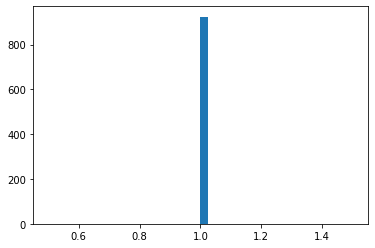

In [477]:
plt.hist(df['viaje_noche_fuera'],bins=40)
plt.show()

In [478]:
df['viaje_noche_fuera'].value_counts()

1    924
Name: viaje_noche_fuera, dtype: int64

In [479]:
df.head()

,ingreso_mensual_aprox,estrato,num_noches,area,diploma_obtenido,nivel_educativo,gastos_transporte_valor,compañía_viaje,motivo_viaje,viaje_noche_fuera,estado_civil,edad
24,1000000.0,3.0,6.0,ANTIOQUIA,bachiller,media,70000.0,personas_hogar_no_compartir_gastos,visita_parientes,1,soltero,55
64,3600000.0,1.0,1.0,ATLANTICO,tecnico_tecnologo,superior_universitaria,50000.0,solo,visita_parientes,1,soltero,45
76,1200000.0,3.0,5.0,BOGOTA,tecnico_tecnologo,superior_universitaria,200000.0,personas_no_hogar_compartir,recreación,1,viudo,42
77,1500000.0,3.0,18.0,BOGOTA,universitario,superior_universitaria,80000.0,solo,recreación,1,soltero,34
80,1200000.0,3.0,3.0,BOGOTA,bachiller,media,90000.0,personas_hogar_no_compartir_gastos,recreación,1,pareja_union_libre,51


In [480]:
df.tail()

,ingreso_mensual_aprox,estrato,num_noches,area,diploma_obtenido,nivel_educativo,gastos_transporte_valor,compañía_viaje,motivo_viaje,viaje_noche_fuera,estado_civil,edad
13997,6000000.0,4.0,2.0,SANTANDER,universitario,superior_universitaria,50000.0,solo,visita_parientes,1,casado,58
14015,950000.0,3.0,2.0,CALDAS,bachiller,media,15000.0,solo,negocios,1,soltero,28
14021,10000000.0,4.0,3.0,BOGOTA,postgrado,superior_universitaria,200000.0,personas_no_hogar_compartir,recreación,1,soltero,35
14022,2000000.0,3.0,16.0,BOLIVAR,bachiller,media,98.0,solo,negocios,1,casado,49
14028,4000000.0,2.0,1.0,RISARALDA,bachiller,media,150000.0,personas_hogar_compartir_gastos,visita_parientes,1,casado,61


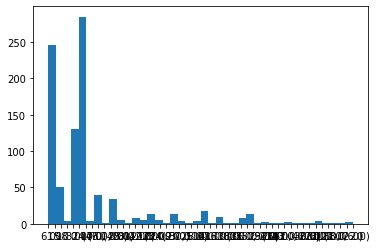

In [481]:
plt.hist(df['num_noches'],bins=40)
plt.show()

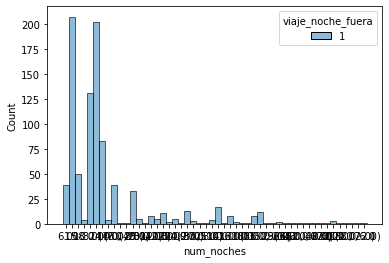

In [482]:
seaborn.histplot(data=df, x='num_noches', hue='viaje_noche_fuera')

In [483]:
df['num_noches'].value_counts()

1.0             207
2.0             202
3.0             131
4.0              83
5.0              50
6.0              39
7.0              39
8.0              33
10.0             17
9.0              13
15.0             12
12.0             11
13.0              8
14.0              8
16.0              8
28.0              5
20.0              5
24.0              5
11.0              4
18.0              4
17.0              4
37.0              3
21.0              3
31.0              2
36.0              2
22.0              2
(4.0, 2.0)        1
46.0              1
27.0              1
(3.0, 8.0)        1
111.0             1
23.0              1
52.0              1
58.0              1
(2.0, 2.0)        1
(1.0, 2.0)        1
(14.0, 30.0)      1
30.0              1
19.0              1
26.0              1
29.0              1
(36.0, 2.0)       1
80.0              1
(6.0, 5.0)        1
41.0              1
25.0              1
(2.0, 3.0)        1
(3.0, 3.0)        1
(40.0, 2.0)       1
76.0              1


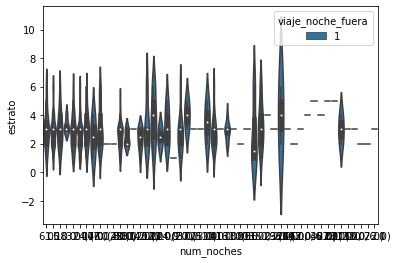

In [484]:
seaborn.violinplot(data=df, y='estrato', x='num_noches', hue='viaje_noche_fuera')

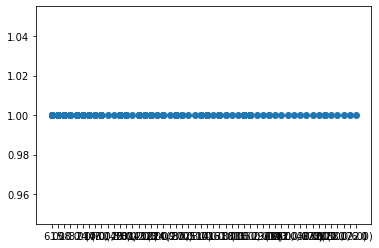

In [485]:
plt.scatter(df['num_noches'],df['viaje_noche_fuera'])

In [494]:
y = df['num_noches']
X = df[['edad']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: ignored

In [487]:
np.asarray(data)

NameError: ignored